## what we are going to answer in that section

4. What is the **distribution of product ratings** (1–5 stars)?
5. What percentage of products have a **rating count above the overall mean**?

In [284]:
import ast 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import seaborn as sns
import statsmodels.api as sm

# Set the path to the file you'd like to load
file_path = 'M:/3_datasets/amazon_data.csv'

# Load the latest version
df = pd.read_csv(file_path)

# clean 
df['actual_price'] = (df['actual_price'].str.replace('₹', '', regex=False).str.replace(',', '', regex=False))
df['discounted_price'] = (df['discounted_price'].str.replace('₹', '', regex=False).str.replace(',', '', regex=False))
df['discount_percentage'] = (df['discount_percentage'].str.replace('%', '', regex=False).str.replace(',', '', regex=False))
df['rating_count'] = (df['rating_count'].str.replace(',', '', regex=False))
df['rating'] = (df['rating'].str.replace('|', '0', regex=False))


df['actual_price']= df['actual_price'].astype(float)
df['discounted_price']= df['discounted_price'].astype(float)
df['discount_percentage']= df['discount_percentage'].astype(float)
df['rating_count']= df['rating_count'].astype(float)
df['rating']= df['rating'].astype(float)

# turn discount_percentage to float percentage
df['discount_percentage']= df['discount_percentage'].apply(lambda x: x/100)

# make the discounted_price more accurate
df['discounted_price'] = (df['actual_price'] * (1 - df['discount_percentage']))

In [285]:
df['category_clean']= df['category'].apply(lambda x: x.split('|')[-1]).copy()

In [286]:
df_USBCables=df[df['category_clean'] == 'USBCables']
df_SmartWatches=df[df['category_clean'] == 'SmartWatches']
df_Smartphones=df[df['category_clean'] == 'Smartphones']
df_SmartTelevisions=df[df['category_clean'] == 'SmartTelevisions']
df_In_Ear=df[df['category_clean'] == 'In-Ear']
df_RemoteControls=df[df['category_clean'] == 'RemoteControls']
df_MixerGrinders=df[df['category_clean'] == 'MixerGrinders']
df_Mice=df[df['category_clean'] == 'Mice']
df_HDMICables=df[df['category_clean'] == 'HDMICables']
df_DryIrons=df[df['category_clean'] == 'DryIrons']


df_concat= pd.concat([df_USBCables,
                    df_SmartWatches,
                    df_Smartphones,
                    df_SmartTelevisions,
                    df_In_Ear,
                    df_RemoteControls,
                    df_MixerGrinders,
                    df_Mice,
                    df_HDMICables,
                    df_DryIrons,])

df_concat

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,category_clean
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,395.64,1099.0,0.64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,USBCables
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,198.93,349.0,0.43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,USBCables
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,189.90,1899.0,0.90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,USBCables
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,328.53,699.0,0.53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,USBCables
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,155.61,399.0,0.61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,USBCables
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,B07YSJ7FF1,Crompton Brio 1000-Watts Dry Iron with Weilbur...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",649.00,1100.0,0.41,4.0,3271.0,PRODUCT: Crompton's dry iron with Weilburger N...,"AF2JJYV2AX7CVSWYMLNZGFVHPLZA,AF4ZKPEZDK4MBC74G...","Lakshmi d.,vishal more,Vasanth Kumar,naveen,Go...","R29AV9WKFL78NP,RWFBNIYQTMW4A,R11CTFK86N4XV0,R2...","Good,Easy to handling ..satisfied,Good,Good,Qu...","Good,https://m.media-amazon.com/images/I/41D5G...",https://m.media-amazon.com/images/I/41Yb7bZL3n...,https://www.amazon.in/Crompton-BRIO-1000-Years...,DryIrons
1371,B07LDPLSZC,Havells Glydo 1000 watt Dry Iron With American...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",844.90,1190.0,0.29,4.2,4184.0,360 degree swivel cord for effortless manoeuvr...,"AFUXDVUZ2STL3ALSLWBDEAJBR7BA,AF7GFM2ILS43R3R7Z...","Swati Chaudhari,Anil kumar,Dinesh Verma,Arvind...","R2MQ8OBLUYQBDI,R2RLW3M6VML3F7,R1J

### 4. What is the **distribution of product ratings** (1–5 stars)?

<Axes: xlabel='rating', ylabel='Count'>

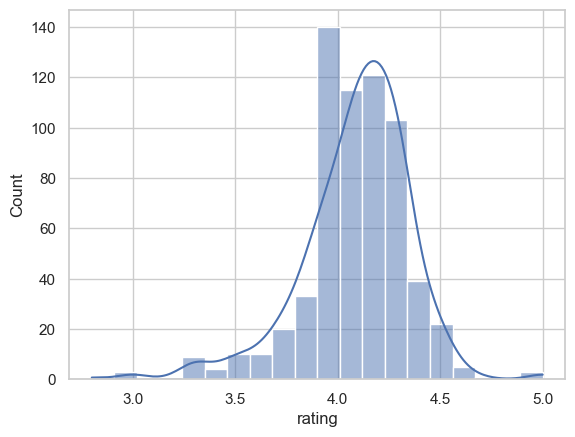

In [287]:
sns.set_theme(style="whitegrid")
sns.histplot(data=df_concat, x='rating', bins=20, kde=True)

<Axes: xlabel='rating'>

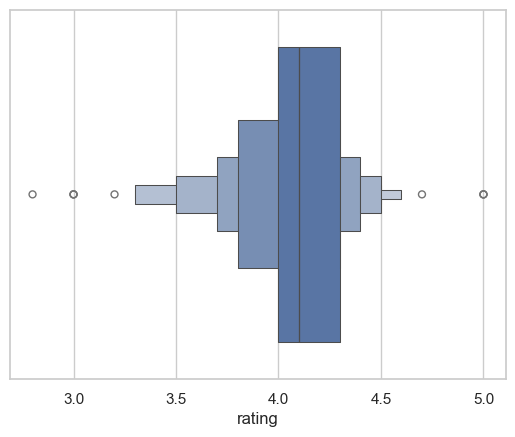

In [288]:
sns.set_theme(style="whitegrid")
sns.boxenplot(data=df_concat, x='rating')

In [289]:
mean_rating= df_concat['rating'].mean()
q1 = df_concat['rating'].quantile(0.25)
q2 = df_concat['rating'].quantile(0.50)
q3 = df_concat['rating'].quantile(0.75)

print("Mean ratings: ", mean_rating)
print("Q1 (25th percentile):", q1)
print("Q2 (50th percentile / median):", q2)
print("Q3 (75th percentile):", q3)

Mean ratings:  4.0915625
Q1 (25th percentile): 4.0
Q2 (50th percentile / median): 4.1
Q3 (75th percentile): 4.3


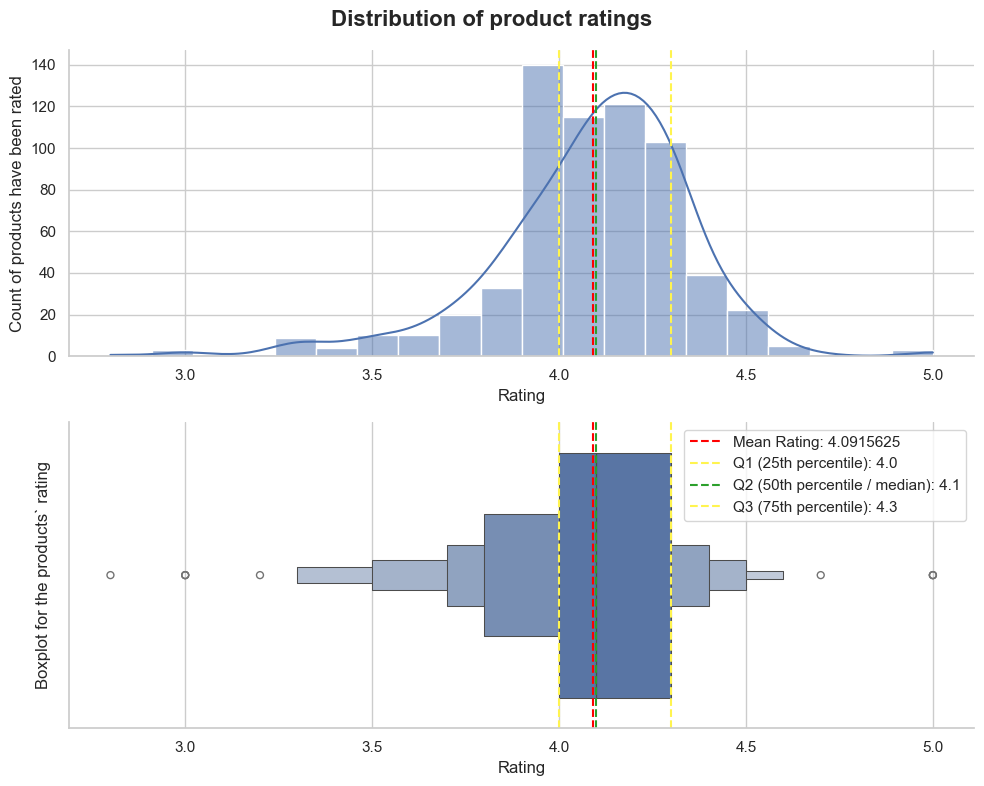

In [290]:
sns.set_theme(style="whitegrid")

fig, ax =plt.subplots(2, 1, figsize=(10, 8))

#----------------------------------------------------------------------#

sns.histplot(data=df_concat, x='rating', bins=20, kde=True, ax=ax[0])
ax[0].set_ylabel('Count of products have been rated')
ax[0].set_xlabel('Rating')

#----------------------------------------------------------------------#

sns.boxenplot(data=df_concat, x='rating', ax=ax[1])
ax[1].set_xlabel('Rating')
ax[1].set_ylabel('Boxplot for the products` rating')

#----------------------------------------------------------------------#

fig.suptitle('Distribution of product ratings', fontsize=16, weight='bold', y=0.98)

#----------------------------------------------------------------------#

ax[0].axvline(x=mean_rating, color='red', linestyle='--', label='Mean Rating: 4.0915625')
ax[1].axvline(x=mean_rating, color='red', linestyle='--', label='Mean Rating: 4.0915625')
ax[0].axvline(x=q1, color='#FFF44F', linestyle='--', label='Q1 (25th percentile): 4.0')
ax[1].axvline(x=q1, color='#FFF44F', linestyle='--', label='Q1 (25th percentile): 4.0')
ax[0].axvline(x=q2, color='#2ca02c', linestyle='--', label='Q2 (50th percentile / median): 4.1')
ax[1].axvline(x=q2, color='#2ca02c', linestyle='--', label='Q2 (50th percentile / median): 4.1')
ax[0].axvline(x=q3, color='#FFF44F', linestyle='--', label='Q3 (75th percentile): 4.3')
ax[1].axvline(x=q3, color='#FFF44F', linestyle='--', label='Q3 (75th percentile): 4.3')

plt.legend()
sns.despine()
plt.tight_layout()
plt.show()

### 5. What percentage of products have a **rating count above the overall mean**?

In [291]:
df_concat_t= df_concat['rating'].value_counts().sum()
df_concat_h= df_concat[df_concat['rating'] > mean_rating].copy()
df_concat_h= df_concat_h['rating'].value_counts().sum()

per_above_mean= df_concat_h/df_concat_t *100

print(f'percentage of products have a rating count above the overall mean is: {per_above_mean}')

percentage of products have a rating count above the overall mean is: 63.90625


```python
bbox_to_anchor = (x, y, width, height)
```

```python
bbox_to_anchor=(1, 0, 0.5, 1)
```

| Value | Meaning                    | Effect                                                                       |
| ----- | -------------------------- | ---------------------------------------------------------------------------- |
| `1`   | x-coordinate               | Moves the legend **1 full width** to the right of the plot area              |
| `0`   | y-coordinate               | Places the **bottom edge** of the legend aligned with the bottom of the plot |
| `0.5` | width of the bounding box  | Not always necessary; can control how wide the box area is                   |
| `1`   | height of the bounding box | Defines vertical extent of the legend box                                    |

So:

> 📍 This puts the legend **outside the plot**, to the right side.

---

### 💡 **Simpler version (most used):**

```python
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
```

Here:

* `loc='center left'` → aligns the **center-left** of the legend box
* `bbox_to_anchor=(1, 0.5)` → places it just **outside the plot** on the right, vertically centered

---

### 🎨 **Quick visualization idea**

```
(0,0)  ----------------- (1,0)
        |   PLOT AREA   |
(0,1)  ----------------- (1,1)
```

If you set `bbox_to_anchor=(1, 0.5)`, you’re telling Matplotlib:

> "Put the legend just to the right (x=1), halfway up (y=0.5)."

---

Would you like me to show you a small visual example (a plot with different `bbox_to_anchor` values side by side) to see how it moves the legend?


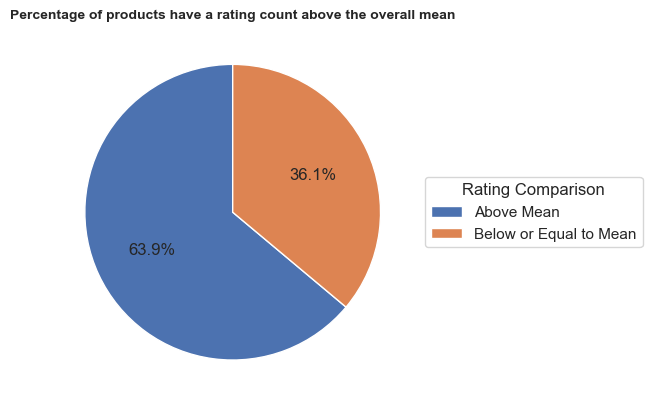

In [300]:
df_T_F= df_concat['rating'] > mean_rating
df_T_F_Counted= df_T_F.value_counts()

plt.pie(df_T_F_Counted, startangle=90, autopct='%1.1f%%')

plt.title('Percentage of products have a rating count above the overall mean', fontsize=10, weight='bold')


plt.legend(['Above Mean', 'Below or Equal to Mean'],
           title='Rating Comparison',
           loc='center left',
           bbox_to_anchor=(1,0.5))
plt.show()